## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\wjr63\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


"""
Compile 模型
"""


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


'\nCompile 模型\n'

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.1115 - acc: 0.6046 - val_loss: 1.4059 - val_acc: 0.5095
Epoch 2/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.0915 - acc: 0.6099 - val_loss: 1.3896 - val_acc: 0.5188
Epoch 3/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.0689 - acc: 0.6190 - val_loss: 1.4053 - val_acc: 0.5149
Epoch 4/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.0543 - acc: 0.6245 - val_loss: 1.4284 - val_acc: 0.5126
Epoch 5/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.0303 - acc: 0.6348 - val_loss: 1.4264 - val_acc: 0.5179
Epoch 6/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.0147 - acc: 0.6400 - val_loss: 1.3913 - val_acc: 0.5260
Epoch 7/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.0022 - acc: 0.6409 - val_loss: 1.

50000/50000 [==============================] - 7s 132us/step - loss: 0.4060 - acc: 0.8540 - val_loss: 2.4718 - val_acc: 0.5058
Epoch 60/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.4125 - acc: 0.8519 - val_loss: 2.5905 - val_acc: 0.5047
Epoch 61/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.3842 - acc: 0.8624 - val_loss: 2.5887 - val_acc: 0.5052
Epoch 62/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.3791 - acc: 0.8650 - val_loss: 2.6066 - val_acc: 0.4986
Epoch 63/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.3799 - acc: 0.8644 - val_loss: 2.6244 - val_acc: 0.5029
Epoch 64/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.3695 - acc: 0.8681 - val_loss: 2.6116 - val_acc: 0.4979
Epoch 65/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.3780 - acc: 0.8646 - val_loss: 2.6689 - val_acc: 0.4968
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 127us/step - loss: 0.2643 - acc: 0.9069 - val_loss: 3.6643 - val_acc: 0.4988
Epoch 118/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.2093 - acc: 0.9253 - val_loss: 3.6736 - val_acc: 0.5026
Epoch 119/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.1926 - acc: 0.9299 - val_loss: 3.6862 - val_acc: 0.5028
Epoch 120/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.2222 - acc: 0.9203 - val_loss: 3.7060 - val_acc: 0.5013
Epoch 121/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.2040 - acc: 0.9263 - val_loss: 3.7904 - val_acc: 0.4943
Epoch 122/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.2701 - acc: 0.9039 - val_loss: 3.7297 - val_acc: 0.4969
Epoch 123/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.2090 - acc: 0.9261 - val_loss: 3.7585 - val_acc: 0.4880
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 8s 166us/step - loss: 0.1327 - acc: 0.9531 - val_loss: 4.3271 - val_acc: 0.4829
Epoch 176/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.1454 - acc: 0.9491 - val_loss: 4.3181 - val_acc: 0.4976
Epoch 177/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.1347 - acc: 0.9522 - val_loss: 4.5677 - val_acc: 0.4912
Epoch 178/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.2391 - acc: 0.9195 - val_loss: 4.3354 - val_acc: 0.4817
Epoch 179/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.1867 - acc: 0.9340 - val_loss: 4.3575 - val_acc: 0.4967
Epoch 180/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.1559 - acc: 0.9438 - val_loss: 4.1849 - val_acc: 0.4942
Epoch 181/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.1535 - acc: 0.9447 - val_loss: 4.4659 - val_acc: 0.4906
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 7s 131us/step - loss: 0.0929 - acc: 0.9678 - val_loss: 4.7125 - val_acc: 0.4960
Epoch 234/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.1079 - acc: 0.9607 - val_loss: 4.7476 - val_acc: 0.4920
Epoch 235/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0978 - acc: 0.9657 - val_loss: 4.7710 - val_acc: 0.4958
Epoch 236/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1350 - acc: 0.9532 - val_loss: 4.7820 - val_acc: 0.4922
Epoch 237/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1849 - acc: 0.9387 - val_loss: 4.7849 - val_acc: 0.4933
Epoch 238/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1392 - acc: 0.9517 - val_loss: 4.7114 - val_acc: 0.4976
Epoch 239/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1262 - acc: 0.9571 - val_loss: 4.7229 - val_acc: 0.5005
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 7s 146us/step - loss: 0.1765 - acc: 0.9441 - val_loss: 4.9567 - val_acc: 0.4833
Epoch 292/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1384 - acc: 0.9553 - val_loss: 4.9414 - val_acc: 0.4873
Epoch 293/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.0754 - acc: 0.9746 - val_loss: 4.9232 - val_acc: 0.4929
Epoch 294/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0657 - acc: 0.9782 - val_loss: 4.9720 - val_acc: 0.4949
Epoch 295/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0736 - acc: 0.9735 - val_loss: 4.9718 - val_acc: 0.4953
Epoch 296/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.1019 - acc: 0.9641 - val_loss: 5.0355 - val_acc: 0.4928
Epoch 297/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1014 - acc: 0.9659 - val_loss: 5.0111 - val_acc: 0.4892
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 5s 91us/step - loss: 0.0633 - acc: 0.9786 - val_loss: 5.1165 - val_acc: 0.4923
Epoch 350/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.1573 - acc: 0.9523 - val_loss: 5.1329 - val_acc: 0.4934
Epoch 351/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.1971 - acc: 0.9380 - val_loss: 5.1708 - val_acc: 0.4903
Epoch 352/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0976 - acc: 0.9666 - val_loss: 5.0413 - val_acc: 0.4909
Epoch 353/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0491 - acc: 0.9836 - val_loss: 5.0178 - val_acc: 0.4965
Epoch 354/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0328 - acc: 0.9891 - val_loss: 5.1121 - val_acc: 0.4938
Epoch 355/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0229 - acc: 0.9933 - val_loss: 5.0442 - val_acc: 0.4997
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 4s 87us/step - loss: 0.1625 - acc: 0.9486 - val_loss: 4.9485 - val_acc: 0.4940
Epoch 408/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0635 - acc: 0.9787 - val_loss: 4.9927 - val_acc: 0.4974
Epoch 409/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0247 - acc: 0.9928 - val_loss: 5.0190 - val_acc: 0.4993
Epoch 410/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0124 - acc: 0.9977 - val_loss: 5.0233 - val_acc: 0.5040
Epoch 411/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0077 - acc: 0.9991 - val_loss: 5.0670 - val_acc: 0.5045
Epoch 412/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0069 - acc: 0.9992 - val_loss: 5.0751 - val_acc: 0.5018
Epoch 413/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0069 - acc: 0.9990 - val_loss: 5.1020 - val_acc: 0.4961
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 4s 87us/step - loss: 0.0040 - acc: 0.9998 - val_loss: 5.1057 - val_acc: 0.5038
Epoch 466/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 5.1164 - val_acc: 0.5022
Epoch 467/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0033 - acc: 0.9998 - val_loss: 5.1674 - val_acc: 0.5024
Epoch 468/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.6172 - acc: 0.8709 - val_loss: 4.6743 - val_acc: 0.4777
Epoch 469/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.2764 - acc: 0.9192 - val_loss: 4.6004 - val_acc: 0.4995
Epoch 470/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0665 - acc: 0.9790 - val_loss: 4.7840 - val_acc: 0.4931
Epoch 471/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0235 - acc: 0.9943 - val_loss: 4.7898 - val_acc: 0.4976s - loss: 0.0241 - acc: 0.
Epoch 47

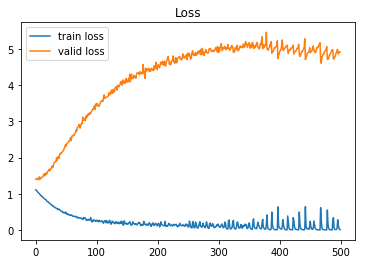

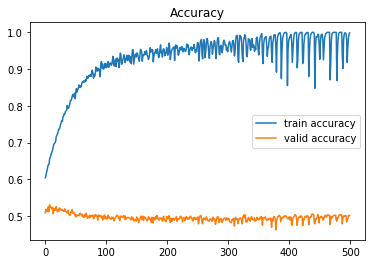

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 75us/step - loss: 0.0058 - acc: 0.9996 - val_loss: 4.9126 - val_acc: 0.5022
Epoch 2/100
50000/50000 [==============================] - 3s 68us/step - loss: 0.0054 - acc: 0.9997 - val_loss: 4.9117 - val_acc: 0.5020
Epoch 3/100
50000/50000 [==============================] - 3s 69us/step - loss: 0.0052 - acc: 0.9997 - val_loss: 4.9109 - val_acc: 0.5017
Epoch 4/100
50000/50000 [==============================] - 4s 76us/step - loss: 0.0050 - acc: 0.9998 - val_loss: 4.9111 - val_acc: 0.5018
Epoch 5/100
50000/50000 [==============================] - 4s 79us/step - loss: 0.0049 - acc: 0.9998 - val_loss: 4.9114 - val_acc: 0.5022
Epoch 6/100
50000/50000 [==============================] - 4s 73us/step - loss: 0.0047 - acc: 0.9999 - val_loss: 4.9118 - val_acc: 0.5023
Epoch 7/100
50000/50000 [==============================] - 4s 72us/step - loss: 0.0046 - acc: 0.9999 - val_loss: 4.9123 - 

50000/50000 [==============================] - 3s 70us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 4.9543 - val_acc: 0.5057
Epoch 60/100
50000/50000 [==============================] - 3s 69us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 4.9550 - val_acc: 0.5057
Epoch 61/100
50000/50000 [==============================] - 4s 74us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 4.9557 - val_acc: 0.5056
Epoch 62/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9563 - val_acc: 0.5055
Epoch 63/100
50000/50000 [==============================] - 3s 68us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9570 - val_acc: 0.5053
Epoch 64/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9577 - val_acc: 0.5053
Epoch 65/100
50000/50000 [==============================] - 4s 79us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9584 - val_acc: 0.5056
Epoch 66/100
50000/50000 [==============

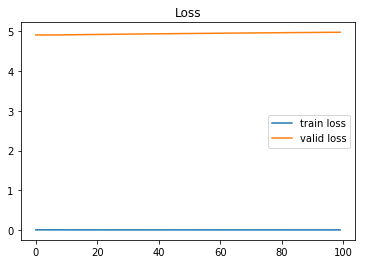

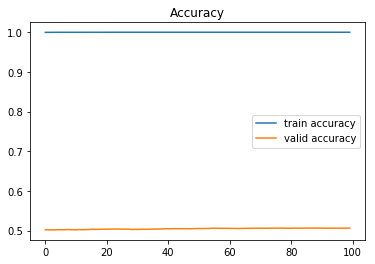

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()